#  Grid Search
Grid Search is a systematic method for hyperparameter tuning that builds and evaluates a model for each combination of hyperparameters specified in a grid. It is a brute-force search that exhaustively tries all possible combinations to find the best set of hyperparameters that optimize the model's performance
### Grid Search Algorithm Steps
**Define the Hyperparameter Grid**: Specify a set of possible values for each hyperparameter to be tuned 

**Build and Evaluate Models**: For each combination of hyperparameters, build a model and evaluate its performance using cross-validation

**Select the Best Model**: Identify the combination of hyperparameters that results in the best performance according to a specified metric (e.g., accuracy, F1 score).
Grid Search is computationally intensive but ensures that the optimal hyperparameters are found within the specified grid. It is particularly useful when the search space is not too large or when computational resources are sufficient.

## Implementation
We will implement Grid Search to optimize hyperparameters for three different classifiers: Support Vector Machine (SVM), Random Forest and k-Nearest Neighbors (k-NN) on a classification dataset. The hyperparameters to be tuned include the regularization parameter C and kernel type (linear, rbf) for SVM, and the number of trees (n_estimators) and maximum depth of the trees (max_depth) for Random Forest,and the number of neighbors (n_neighbors) and the weight function used in prediction (weights) for k-NN.

## 1. Support Vector Classifier

In [42]:
import numpy as np 
import pandas as  pd 
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt 
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV

In [14]:
# Generate synthetic classification data with more decisive separation
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=2.0, random_state=42)


In [15]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid_svm={
    'C':[0.1 ,1 ,10 ,100],
    'kernel': ['linear', 'rbf']
}
svm=SVC()

grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [25]:
# Print best params
print("Best parameters found:", grid_search_svm.best_params_)

Best parameters found: {'C': 0.1, 'kernel': 'linear'}


In [31]:
best_params_svm=grid_search_svm.best_params_
print(f"Best Parameters for SVM: {best_params_svm}")

Best Parameters for SVM: {'C': 0.1, 'kernel': 'linear'}


In [32]:
# Train the model with the best hyperparameters for SVM
best_svm=grid_search_svm.best_estimator_

In [33]:
# Predict on the test set for SVM
y_pred_svm = best_svm.predict(X_test)

In [34]:
# Evaluate the model for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test Set Accuracy: {accuracy_svm}")

SVM Test Set Accuracy: 0.9833333333333333


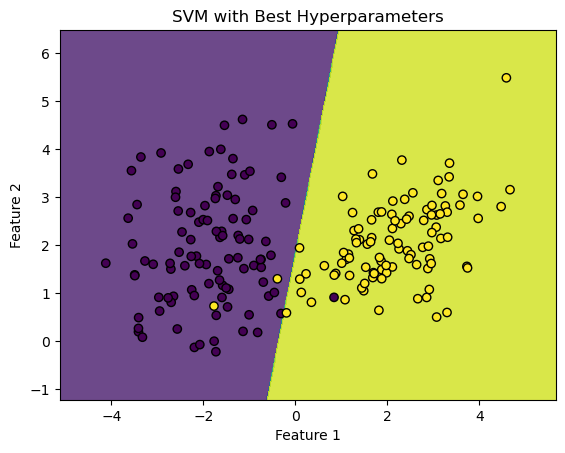

In [35]:
# Visualization of the decision boundary for SVM

# Create a mesh grid for plotting
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundary for SVM
Z_svm = best_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)
plt.contourf(xx, yy, Z_svm, alpha=0.8)

# Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title('SVM with Best Hyperparameters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#  Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter space for Random Forest
param_space_rf = {
    'n_estimators': Integer(10, 200),
    'max_features': Categorical(['sqrt', 'log2',None]),
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'bootstrap': Categorical([True, False])
}

In [46]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Initialize the Bayesian Search for Random Forest
bayes_search_rf = BayesSearchCV(rf, param_space_rf, n_iter=20, cv=3, scoring='accuracy', random_state=42)

# Perform Bayesian Optimization for Random Forest
bayes_search_rf.fit(X_train, y_train)

# Best hyperparameters for Random Forest
best_params_rf = bayes_search_rf.best_params_
print(f"Best Parameters for Random Forest: {best_params_rf}")

Best Parameters for Random Forest: OrderedDict({'bootstrap': False, 'max_depth': 44, 'max_features': 'sqrt', 'min_samples_leaf': 19, 'min_samples_split': 18, 'n_estimators': 22})


In [47]:
# Train the model with the best hyperparameters for Random Forest
best_rf = bayes_search_rf.best_estimator_

# Predict on the test set for Random Forest
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Set Accuracy: {accuracy_rf}")

Random Forest Test Set Accuracy: 0.9666666666666667


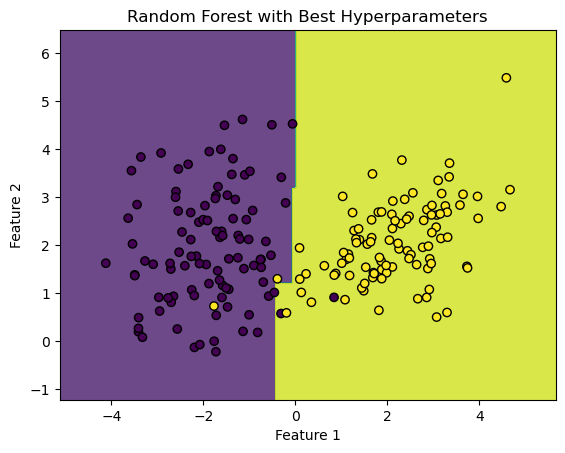

In [48]:
# Visualization of the decision boundary for Random Forest

# Plot decision boundary for Random Forest
Z_rf = best_rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rf = Z_rf.reshape(xx.shape)
plt.contourf(xx, yy, Z_rf, alpha=0.8)

# Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title('Random Forest with Best Hyperparameters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Conclusion
Bayesian Optimization is an advanced hyperparameter optimization technique that intelligently explores the hyperparameter space by leveraging a probabilistic model and an acquisition function. In our implementation, we used Bayesian Optimization to tune hyperparameters for both Support Vector Machine (SVM) and Random Forest classifiers on a synthetic classification dataset. The results demonstrated improved model performance, highlighting the effectiveness of Bayesian Optimization in finding optimal hyperparameters with fewer evaluations compared to traditional methods like Grid Search and Random Search.